In [1]:
import os
import json
from scipy.stats import wasserstein_distance

In [2]:
base_dir = "/Users/teliov/TUD/Thesis/Medvice/Notebooks/data/definitions"

In [4]:
condition_files = [
    os.path.join(base_dir, "symcat_conditions.json"),
    os.path.join(base_dir, "symcat_condition_pct_%d.json" % 10),
    os.path.join(base_dir, "symcat_condition_pct_%d.json" % 10),
    os.path.join(base_dir, "symcat_condition_pct_%d.json" % 30),
    os.path.join(base_dir, "symcat_condition_pct_%d.json" % 50),
    os.path.join(base_dir, "symcat_condition_pct_%d.json" % 70)
]

In [5]:
json_data = []
for file in condition_files:
    with open(file) as fp:
        json_data.append(json.load(fp))

In [6]:
import numpy as np

In [7]:
num_conditions = len(json_data[0])

In [16]:
distance = np.zeros((num_conditions, len(json_data) - 1))

In [13]:
condition_names = sorted(json_data[0].keys())

In [21]:
for idx, condition in enumerate(condition_names):
    symptoms = sorted(json_data[0][condition].get("symptoms").keys())
    base_symptoms = np.array([json_data[0][condition].get("symptoms").get(sym).get("probability") for sym in symptoms])
    
    for jdx in range(1, len(json_data)):
        pct_symp = np.array([json_data[jdx][condition].get("symptoms").get(sym).get("probability") for sym in symptoms])
        
        dist = wasserstein_distance(base_symptoms, pct_symp)
        distance[idx, jdx-1] = dist

In [28]:
import matplotlib.pyplot as plt

In [23]:
avg = np.mean(distance, axis=0)

In [25]:
std = np.std(distance, axis=0)

In [22]:
# accuracy learning curve
dist_fig, dist_ax = plt.subplots()

#plt.errorbar(range(1, avg.shape[0]+1), avg, yerr=std, marker='o', capsize=3, linestyle='None')
dist_ax.errorbar(range(1, avg.shape[0] +1), avg, capsize=3, linestyle='None')
dist_ax.set_xticks([10, 20, 30, 50, 70])


dist_ax.grid()
dist_ax.fill_between(
        sample_size, train_acc_score - train_acc_score_std, 
        train_acc_score + train_acc_score_std, alpha=0.1, color="r"
    )
acc_ax.fill_between(
        sample_size, test_acc_score - test_acc_score_std,
        test_acc_score + test_acc_score_std, alpha=0.1, color="g"
    )
acc_ax.plot(sample_size, train_acc_score,'o-', color="r", label="Train Score")
acc_ax.plot(sample_size, test_acc_score,'o-', color="g", label="Validation Score")
acc_ax.legend(loc='best')
acc_ax.set_ylabel('Accuracy')
acc_ax.set_xlabel('Train Sample Size')
acc_ax.xaxis.set_major_formatter(formatter) 
acc_ax.set_title('Naive Bayes Learning Curve (Accuracy) for Baseline Dataset')
acc_fig.savefig(os.path.join(fig_dir, "learning_acc_nb_baseline.png"))

array([2.06666667, 2.06666667, 5.41666667, 8.66666667, 6.15      ])

In [37]:
distance[3, :]

array([ 3.65      ,  3.65      , 13.24166667, 19.125     , 23.11666667])

In [27]:
std

array([0.98370667, 0.98370667, 2.49963406, 3.9360772 , 5.9969159 ])

<ErrorbarContainer object of 3 artists>

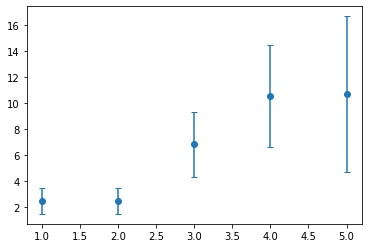

In [38]:
distance.shape

(801, 5)